# Matemática Computacional I
- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufsm.br

## Integração numérica

A integração numérica é útil em situações nas quais não se conhece a expressão analítica da função a ser integrada ou quando a função primitiva é difícil de se obter ou não existe. Uma forma de se calcular uma aproximação numérica para uma integral é por meio da integração do polinômio interpolador. Esse processo é conhecido como quadratura de Newton-Cotes e é desenvolvido por meio das sistemáticas conhecidas como *Regra dos Trapézios*, *Regra 1/3 de Simpson* e *Regra 3/8 de Simpson*. Antes de apresentarmos as fórmulas de Newton-Cotes, vamos relembrar um pouco do Cálculo.

Considere uma função $f(x)$ contínua no intervalo $[a,b]$. Então, sabemos que

$$I=\int_a^b f(x)dx = F(b) - F(a)$$

em que a função $F(x)$ é a primitiva (ou antiderivada) de $f$, ou seja, é tal que $F'(x) = f(x)$.

Graficamente, considerando a função $f(x) \geq 0$, para todo $x \in [a,b]$ podemos interpretar a intergral $I=\int_a^b f(x)dx$ como a área entre a curva de $f$ e o eixo das abcissas:

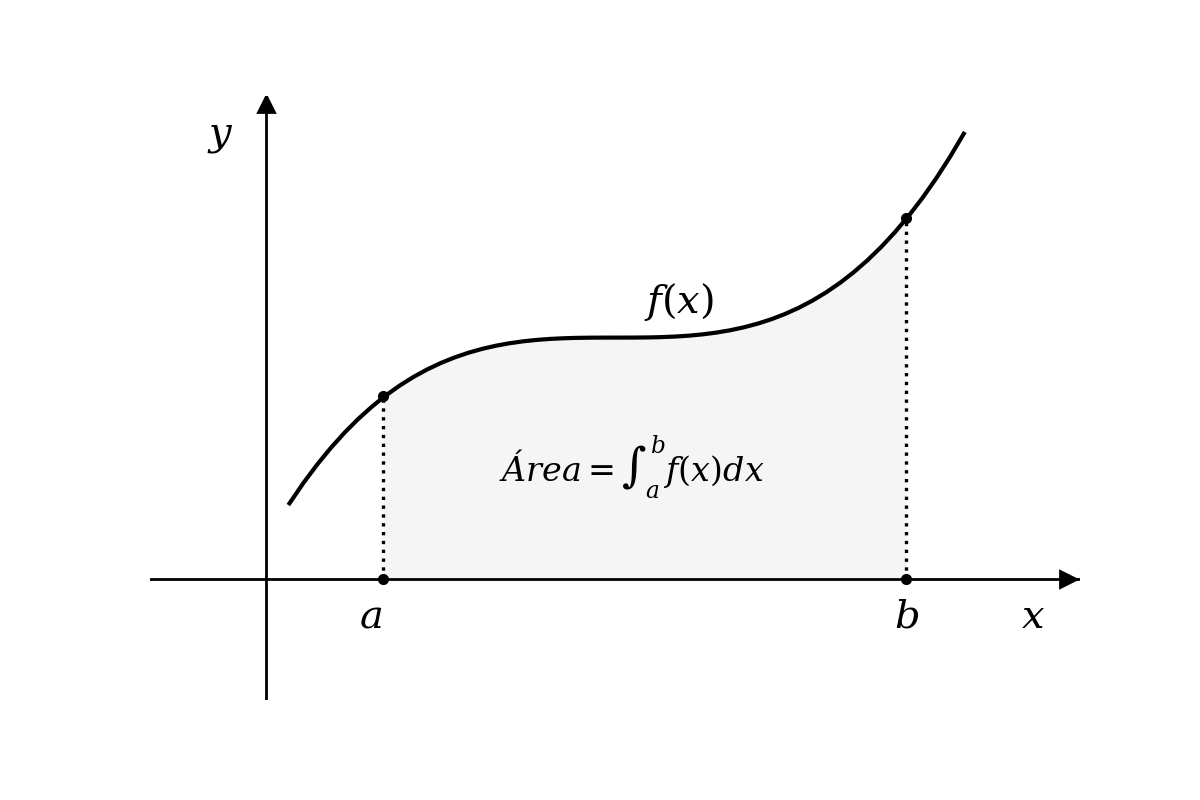
Figura 6.1 - A integral definida como área sob o gráfico

### Integral via somas de Riemann

A forma mais simples de obter um valor aproximado para uma integral definida é por meio da soma de Riemann. 

Para isto, divide-se o intervalo de integração $(a,b)$ em $n$ subintervalos e somam-se as áreas dos retângulos definidos em cada subintervalo. A largura de cada retângulo será dado por $h=\frac{x_n-x_0}{n}$ e a altura será dada por $f(x)$ para algum $x$ dentro do subintervalo $[x_i,x_{i+1}]$, com $i=0,1,...,n$. Uma escolha natural para o valor de $x$ é um dos extremos do intervalo, o extremo esquerdo $x_i$ ("pela esquerda") ou o extremo direito $x_{i+1}$ ("pela direita"):


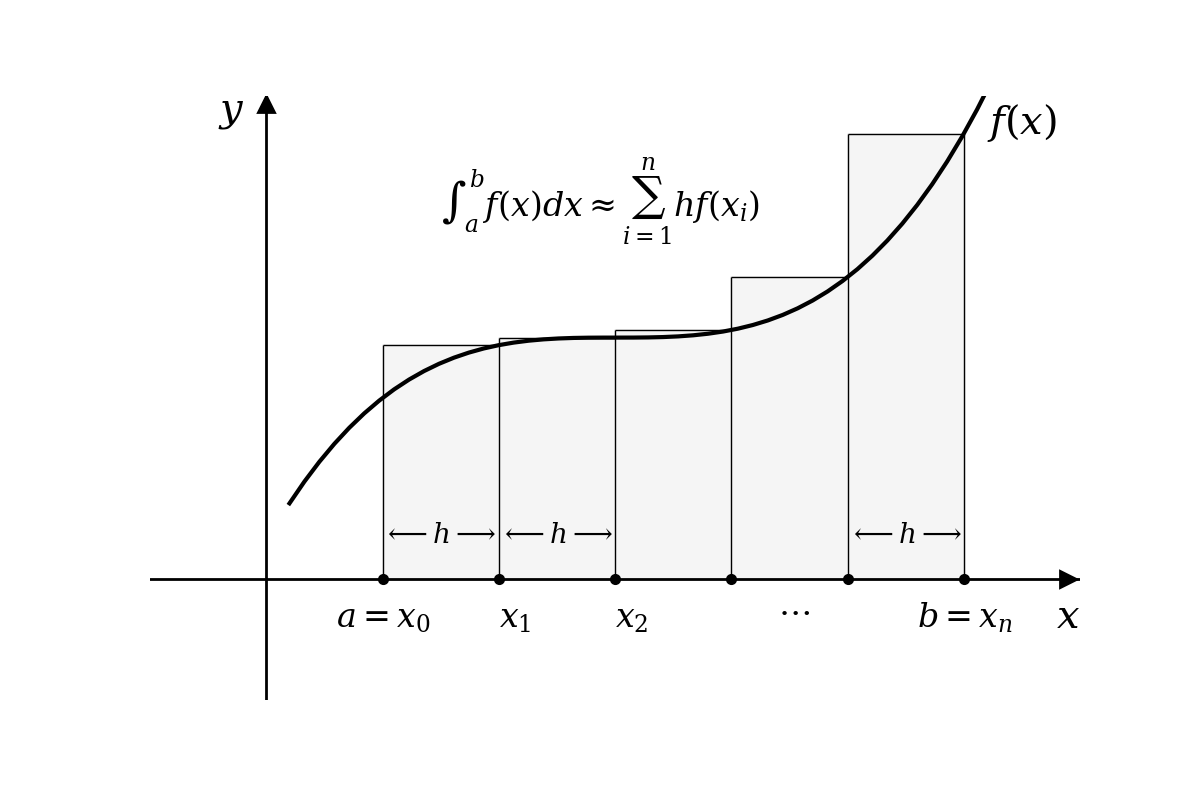
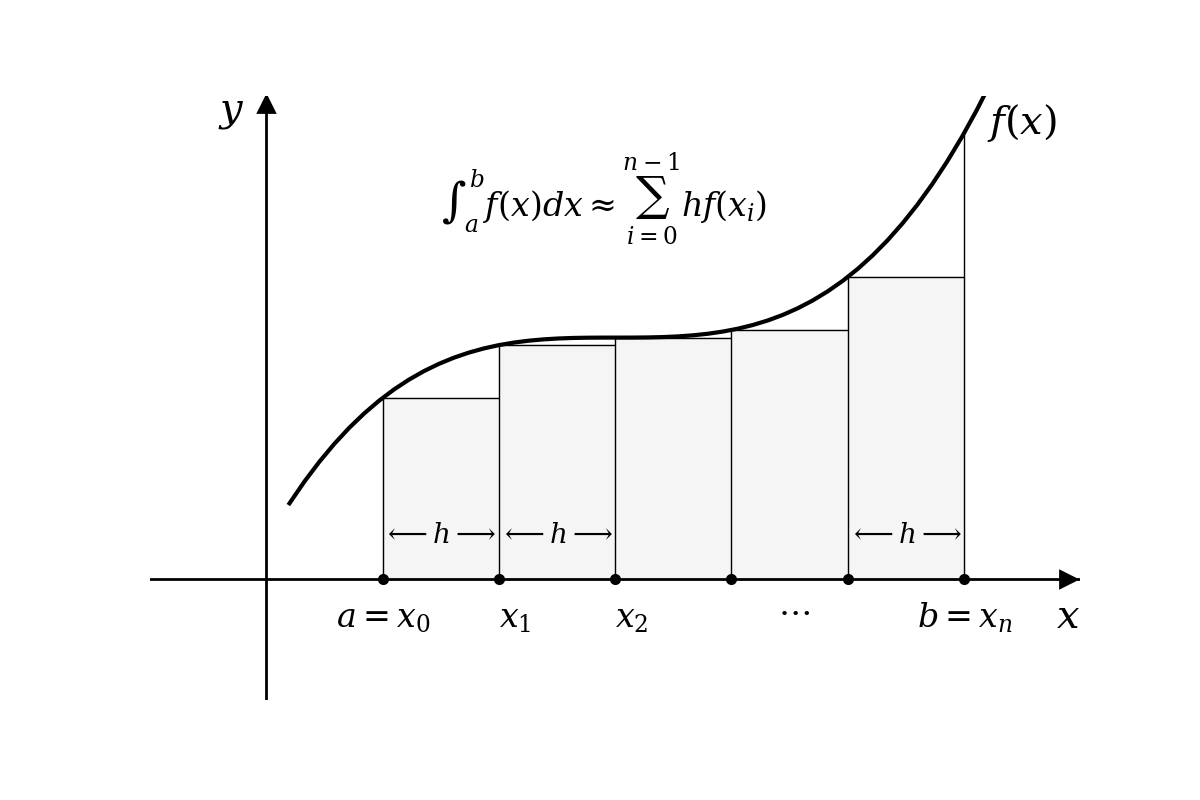


Claramente podemos aumentar a acurácia da aproximação obtida aumentando o número de subintervalos. A _regra do ponto médio_ considera a altura do retângulo definida em cada subintervalo como sendo o valor da função no ponto médio entre $x_i$ e $x_{i+1}$:

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf\left(\frac{x_i+x_{i+1}}{2} \right)$$



In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Vamos começar simples, calculando a integral de f(x) = x^2 sin(x)

def integral_definida_esquerda(f, a, b, n):
  #criando o valor de h
  h = (b-a)/n
  #criando o dominio
  xi = np.linspace(a,b,n)

  #calulando a integral
  integral = np.sum(f(xi[0:n-1])) * h

  return integral


def integral_definida_direita(f, a, b, n):
  #criando o valor de h
  h = (b-a)/n
  #criando o dominio
  xi = np.linspace(a,b,n)

  #calulando a integral
  integral = np.sum(f(xi[1:n])) * h

  return integral

def integral_definida_pt_medio(f, a, b, n):
  #criando o valor de h
  h = (b-a)/n
  #criando o dominio
  xi = np.linspace(a,b,n)

  #calulando a integral

  integral = 0
  for i in range(0,n-1):
    integral = integral + h*f((xi[i] + xi[i+1])/2)

  return integral

f = lambda x: np.sin(x)*x**2
a = 0
b = np.pi
n = 1000

print(integral_definida_esquerda(f,a,b,n))
print('*'*100)
print(integral_definida_direita(f,a,b,n))
print('*'*100)
print(integral_definida_pt_medio(f,a,b,n))

Podemos utilizar o ``sympy`` para obter a integração simbólica.

**Exemplo 1** 

Vamos obter a integral $\int_{0.1}^{0.8} x^2ln(x)dx$ usando `sympy`

In [ ]:
import sympy as sp

x = sp.symbols('x')
sp.init_printing(use_unicode=True)

f = x**2*log(x)
sp.integrate(f, x)

Calculando o resultado a integral definida, usando o Teorema Fundamental do Cálculo

In [5]:
F = lambda x: x**3*log(x)/3 - x**3/9
I = F(0.8)-F(0.1)
print(I)

-0.0940934155044049


Vamos obter aproximações numéricas usando soma de Riemann pela esquerda, pela direita e pela regra do ponto médio, e comparar os resultados.

Agora o resultado aproximado pela soma de Riemann com 7 subintervalos, ou seja, $h = 0.1$

In [4]:
xi = np.linspace(0.1, 0.8, 8)
h = xi[1]-xi[0]

f = lambda x: x**2*np.log(x)

Ie = h*np.sum(f(xi[0:-1]))
print("Ie=",Ie, "Erro=",abs(I-Ie))

Id = h*np.sum(f(xi[1:]))
print("Id=",Id, "Erro=",abs(I-Id))

Im = h*np.sum(f((xi[0:-1]+xi[1:])/2))
print("Im=",Im, "Erro=",abs(I-Im))


Ie= -0.08743221791422254 Erro= 1.00381491955908
Id= -0.09941082010533792 Erro= 1.00492910752650
Im= -0.09443022564968762 Erro= 1.00444863856558


Nesse exemplo é possivel notar que a regra do ponto médio forneceu a melhor aproximação.

**Atividade 1:**

Calcule primeiramente a integral indefinida (usando o `sympy`) das funções abaixo. Logo após, compare o resultado obtido com aproximações numéricas para as integrais definidas.




A seguir serão apresentados três métodos para integração numérica baseados na integração do polinômio interpolador conhecidos como Regras de Newton-Cotes. São eles, a regra dos trapézios, a regra 1/3 de Simpson e a regra 3/8 de Simpson.

### Regra dos trapézios

Consiste am aproximar a integral da função em um intervalo [𝑎,𝑏] pela integral do polinômio de grau 1 que passa pelos pontos (𝑎,𝑓(𝑎)) e (𝑏,𝑓(𝑏)). Se 𝑓(𝑥)>0 em [𝑎,𝑏] a área entre o gráfico da função e o eixo 𝑥 é aproximado pela área do trapézio de altura ℎ=𝑏−𝑎 e bases 𝑓(𝑎) e 𝑓(𝑏).

Considere uma função $f(x)$ definida nos pontos $x_0$ e $x_1$ no intervalo $[a,b]$. O polinômio de Lagrange para  esses pontos, considerando a mudança de variável $u = \frac{x-x_0}{h}$, é dado por

$$P(u) =  f(x_0) (1-u) + f(x_1)(u)$$

e a integral pode ser aproximada como segue

$$\int_{x_0}^{x_n} f(x) dx \approx \int_{x_0}^{x_1} P_1(x) dx= h \int_{0}^{1} P_1(u) du$$

ou, ainda,

$$h \int_{0}^{1} P_1(u) du  = h \int_{0}^{1} [f(x_0) (1-u) + f(x_1)(u)] du = h f(x_0) \int_{0}^{1} (1-u) du + hf(x_1)\int_{0}^{1} (u) du$$

que resulta em

$$\int_{x_0}^{x_n} f(x) dx \approx \frac{h}{2} [f(x_0)+f(x_1)]$$

ou seja, tem-se aqui a fórmula da área do trapézio.


Graficamente, tem-se

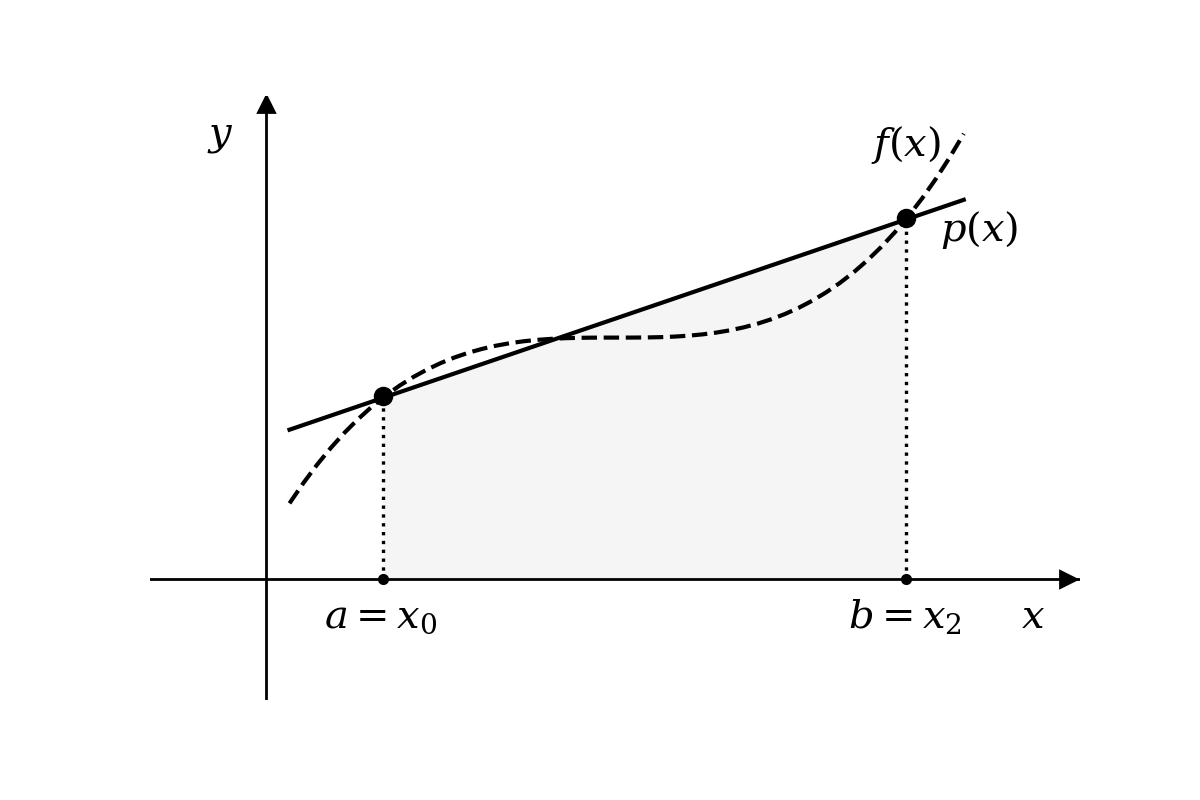


A **regra dos trapézios repetida** (ou generalizada), consiste na subdivisão do intervalo $[a,b]$ em $n$ subintervalos iguais, de amplitude $h=\frac{x_n-x_0}{n}$, $x_0=a$ e $x_n=b$ e na aplicação da regra dos trapézios repetidamente a cada dois pontos consecutivos.

Assim, temos

$$\int_{x_0}^{x_n} f(x) dx \approx \frac{h}{2} [f(x_0)+f(x_1)] + \frac{h}{2} [f(x_1)+f(x_2)] + ... + \frac{h}{2} [f(x_{n-1})+f(x_n)]=$$

$$= \frac{h}{2} [f(x_0)+ 2f(x_1) + 2f(x_2)+...+2f(x_{n-1})+f(x_n)] =$$

$$= \frac{h}{2} \{f(x_0)+ 2[f(x_1) + f(x_2)+...+f(x_{n-1})]+f(x_n)\}$$

E o **limitante superior** para o erro será dado por

$$|E_t| \leq \frac{h^2}{12}(x_n-x_0) max.\{|f^{(2)}(x)|, x_0 \leq x \leq x_n \}$$

**Exemplo 2:** 

Vamos calcular o valor aproximado da integral

$$\int_{1.5}^{5.5} \frac{1}{x}dx$$

usando a regra dos trapézios.

_Solução:_ Basta fazer  $$\int_{1.5}^{5.5} \frac{1}{x} dx \approx \frac{4}{2} [f(1.5)+f(5.5)] = 2 \left( \frac{1}{1.5} + \frac{1}{5.5} \right) \approx 1.697$$

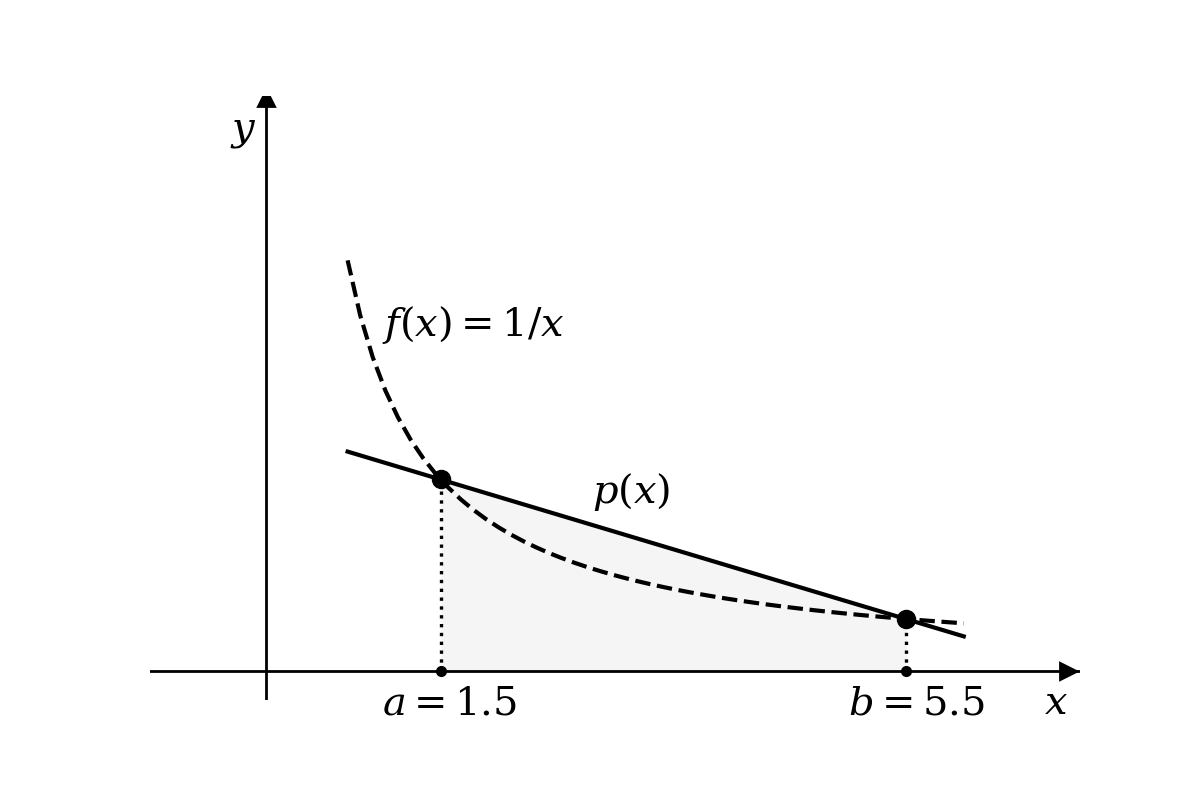

Resolvendo analiticamente o valor exato é $ln(5.5)$ - $ln(1.5)$ que pode ser calculado usando  uma calculadora obtendo-se $1.2992829841302609$. O valor obtido pela regra do trapézio é maior, como pode ser verificado observando na figura, comparando-se as áreas. Vamos usar a regra dos trapézios repetida para 5, 10 e 100 subintervalos para ver como fica.

In [ ]:
import numpy as np

x0 = 1.5
xn = 5.5
f = lambda x: 1/x

for n in [5,10,100, 1000, 10000]:
  h = (xn-x0)/n
  xi = np.linspace(x0, xn, n+1)
  It = (h/2)*(f(xi[0]) + 2*np.sum(f(xi[1:-1])) + f(xi[-1]))
  print ("n=",n,", I=",It)

###  Regra 1/3 de Simpson

Consiste em aproximar a integral da função pela integral de um polinômio interpolador de grau 2. Para isso dividimos o intervalo de integração subintervalos e a cada 3 pontos usamos a integral do polinômio interplolador como aproximação da integral da função nesses dois subintervalos.

Então, considere uma função $f(x)$ definida em três pontos distintos $x_0$, $x_1$ e $x_2$ equidistantes no intervalo $[a,b]$. O polinômio de Lagrange para esses pontos, considerando a mudança de variável $u = \frac{x-x_0}{h}$ é dado por

$$ P_2(u) =  f(x_0) \left( \frac{u^2-3u+2}{2}\right) + f(x_1)\left( \frac{u^2-2u}{-1}\right) + f(x_2)\left( \frac{u^2-u}{2}\right)$$

A integral pode ser aproximada como segue

$$ \int_{x_0}^{x_n} f(x) dx \approx \int_{x_0}^{x_2} P_2(x) dx= h \int_{0}^{2} P_2(u) du $$

ou, ainda,

$$ h \int_{0}^{2} P_2(u) du  = h f(x_0)(u) \Big|_0^2 + h (f(x_1)-f(x_0))\left( \frac{u^2}{2} \right) \Big|_0^2
+ \frac{h}{2}(f(x_ 2)-2f(x_1)+f(x_ 0)) \left(\frac{u^3}{3}-\frac{u^2}{2} \right) \Big|_0^2 =$$

$$ = 2hf(x_0)+2hf(x_1)-2hf(x_0)+\frac{h}{3} ( f(x_2)-2f(x_1)+f(x_0)) = $$

$$ \frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]$$

Assim, temos

$$ \int_{x_0}^{x_n} f(x) dx \approx \frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]$$

conhecida como **Regra 1/3 de Simpson**.


Graficamente, tem-se

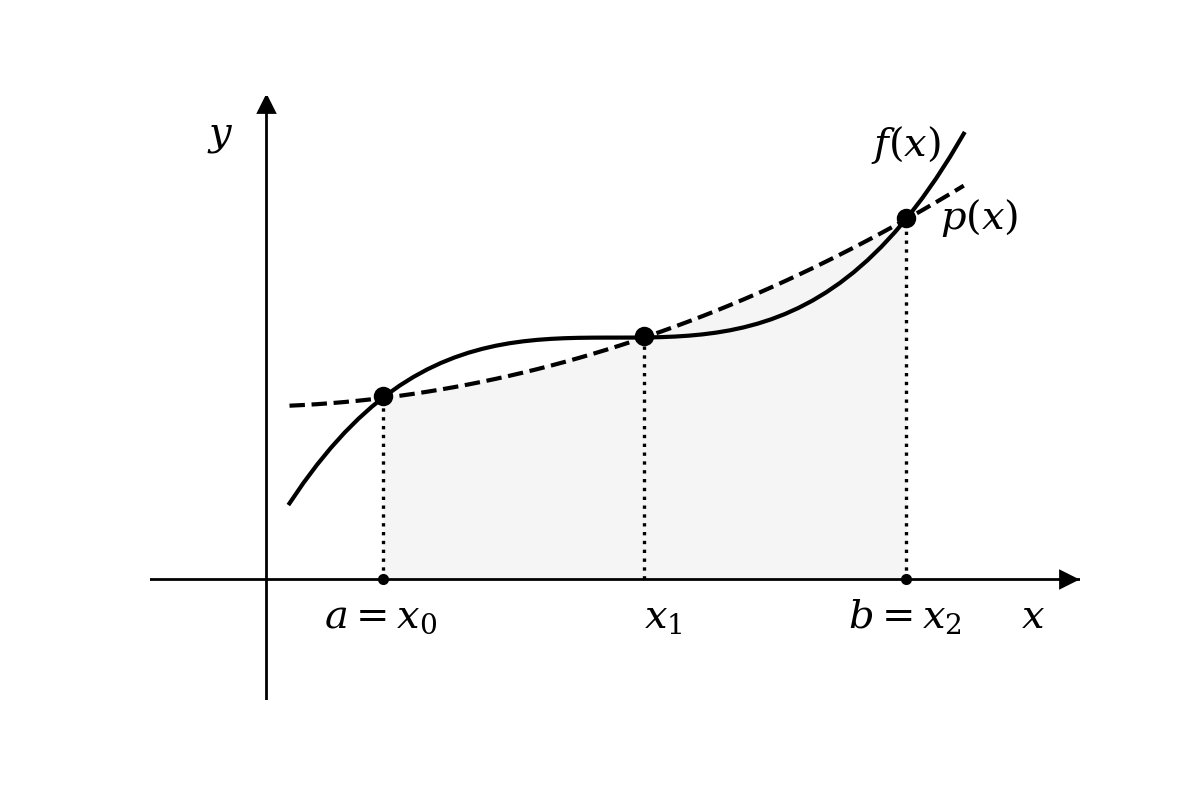

A **regra 1/3 de Simpson repetida** (ou generalizada) consiste em subdividirmos o intervalo de integração $[a,b]$ em $n$ subintervalos de ampliture $h$, que que $n$ é um número par de subintervalos, com $x_0=a$ e $x_n=b$, então, aplicando a regra 1/3 de Simpson a cada 2 subintervalos consecutivos, obtemos

$$ \int_{x_0}^{x_n} f(x) dx \approx \frac{h}{3} [f(x_0)+4f(x_1)+f(x_2)] + \frac{h}{3} [f(x_2)+4f(x_3)+f(x_4)] + ... + \frac{h}{3} [f(x_{n-2})+4f(x_{n-1})+f(x_n)]=$$

$$ = \frac{h}{3} [f(x_0)+ 4f(x_1) + 2f(x_2)+ 4f(x_3)+...+2f(x_{n-2})+4f(x_{n-1})+f(x_n)] = $$

$$ = \frac{h}{3} \{f(x_0)+ 4[f(x_1) + f(x_3)+...+f(x_{n-1})]+ 2[f(x_2) + f(x_4)+...+f(x_{n-2})] + f(x_n)\}  $$

**Exemplo 3** 

Calcule o valor aproximado da integral $\int_{0.5}^{1.5}cos(x)dx$ usando a regra 1/3 de Simpson.

In [ ]:
x0 = 0.5
xn = 1.5
n = 2
h = (xn-x0)/n

f = lambda x: np.cos(x)
x = np.linspace(x0, xn, n+1)
y = f(xi)

# Regra 1/3 de Simpson
Is = (h/3)*(y[0] + 4*y[1] + y[2])
print ("Resultado 1/3 Simpson: ", Is)


**Exemplo 4** 

Calcule o valor aproximado da integral $\int_1^4(xe^x+3)dx$ usando a regra 1/3 de Simpson para 10, 20 e 100 subintervalos.

In [ ]:
#primeiro, calculamos a integral indefinica simbolicamente

x = sp.symbols('x')
f = x*exp(x) + 3

sp.integrate(f,x)

In [ ]:
res = lambda x: 3*x + (x-1)*np.exp(x)
res(4) - res(1)

In [ ]:
x0 = 1.0
xn = 4.0
f = lambda x: x*np.exp(x)+3

for n in [10,20,100,10000]:
  h = (xn-x0)/n
  x = np.linspace(x0, xn, n+1)
  y = f(x)
  I = (h/3)*(y[0] + 4*np.sum(y[1:n:2]) + 2*np.sum(y[2:n:2])+ y[-1])
  print ("n=",n,", I=",I)

###  Regra 3/8 de Simpson

Consiste em aproximar a integral da função pela integral de um polinômio interpolador de grau 3. Para isso dividimos o intervalo de integração subintervalos e a cada 4 pontos usamos a integral do polinômio interpolador como aproximação da integral da função nesses 3 subintervalos.

Então, considere uma função $f(x)$ definida em quatro pontos distintos $x_0$, $x_1$, $x_2$ e $x_3$ equidistantes no intervalo $[a,b]$. O polinômio interpolador de Lagrange para esses pontos, considerando a mudança de variável $u = \frac{x-x_0}{h}$ é dado por

$$P_3(u)=f(x_0) \left[ \frac{(u-1)(u-2)(u-3)}{-6}\right] + f(x_1) \left[ \frac{u(u-2)(u-3)}{2} \right] + f(x_2) \left[
\frac{u(u-1)(u-3)}{-2}\right]+ f(x_3)\left[ \frac{u(u-1)(u-2)}{6}  \right]$$

ou

$$P_3(u)=f(x_0) \left[ \frac{u^3-6u^2+11u-6}{-6}\right] + f(x_1) \left[ \frac{u^3-5u^2+6u}{2} \right] + f(x_2) \left[ \frac{u^3-4u^2+3u}{-2}\right]  + f(x_3)\left[ \frac{u^3-5u^2+6u}{6}  \right]$$

O que fornece

$$ \int_{x_0}^{x_3} f(x) dx \approx  h \int_{0}^{3} P_3(u) du = \frac{3}{8}h \left[f(x_0)+3f(x_1)+3f(f_2)+f(x_3) \right]$$

Então



$$\int_{x_0}^{x_3} f(x) dx \approx \frac{3}{8}h \left[f(x_0)+3f(x_1)+3f(x_2)+f(x_3) \right]$$

que consiste na regra 3/8 de Simpson.

Graficamente, tem-se

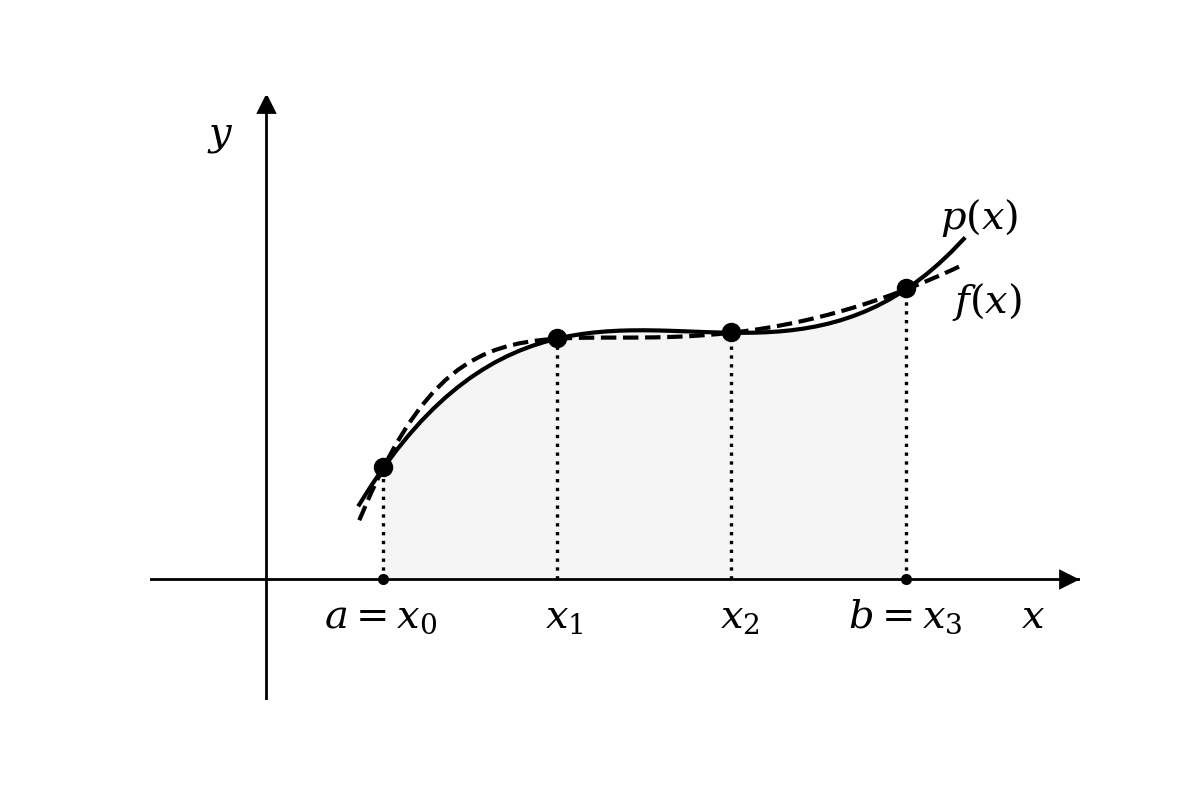

A **regra 3/8 de Simpson repetida** (ou generalizada) consiste em subdividir o intervalo de integração $[a,b]$ em $n$ subintervalos de ampliture $h$, em que $n$ é um número múltiplo de 3, com $x_0=a$ e $x_n=b$, então, aplicar a regra 3/8 de Simpson repetidamente a cada 3 subintervalos consecutivos. Com isso obtém-se:

$$ \int_{x_0}^{x_n} f(x) dx \approx \frac{3}{8}h \left[
f(x_0) + 3f(x_1)+3f(x_2)+f(x_3) \right] +
\frac{3}{8}h \left[f(x_3)+3f(x_4)+3f(x_5)+f(x_6) \right] +
... + \frac{3}{8}h \left[f(x_{n-3})+3f(x_{n-2})+3f(x_{n-1})+f(x_n) \right]$$


$$ = \frac{3}{8}h \left\{ f(x_0) +
3 \left[f(x_1)+f(x_2)+f(x_4)+f(x_5)+....+ f(x_{n-2})+f(x_{n-1})\right] +
2 \left[f(x_3)+f(x_6)+....+f(x_{n-3}) \right] + f(x_n)\right\}$$

que consiste na regra 3/8 de Simpson repetida.

**Exemplo 5**

Calcule o valor aproximado da integral $\int_1^7 ln(x+9) dx$ usando a regra 3/8 de Simpson.

In [ ]:
x = np.linspace(1,7,4)
h = x[1]-x[0]

f = lambda x: np.log(x+9)
I = (3*h/8)*(f(x[0]) + 3*f(x[1])+3*f(x[2])+f(x[3]))
print(I)

**Exemplo 6** 

Calcule o valor aproximado da integral $\int_1^6 ln(x+9) dx$ usando a regra 3/8 de Simpson para 8, 20 e 40 subintervalos.

In [ ]:
x0 = 1.0; xn = 6.0
f = lambda x: np.log(x+9)

for n in [4,20,40]:
    h = (xn-x0)/n
    x = np.linspace(x0, xn, n+1)
    y = f(x)
    # Regra 3/8 de Simpson usando funções do numpy
    I = (3*h/8)*(y[0] + 3*np.sum(y[1:n-1:3]+y[2:n:3]) +\
                 2*np.sum(y[3:n:3])+ y[-1])
    print ("n=",n,", I=",I)

**Atividade 2:**

Desenvolva uma função em python (sem bibliotecas prontas) para encontrar a solução de um sistema linear qualquer de ordem $n$. 

**Atividade 3:**

Desenvolva uma função em python (sem bibliotecas prontas) para encontrar a solução de um sistema linear qualquer de ordem $n$. 

**Exercícios:**

Encontre, se possível, a primitiva das seguintes funções usando `sympy`, então obtenha a solução exata e compare com soluções numéricas usando somas de Riemann e os métodos de Newton-Cotes para diferentes números de subintervalos. Compare os resultados.  


a) $\int_{1}^{1.6} \frac{2x}{x^2-4} dx$  

b) $\int_{0}^{1} x^2 e^{-x} dx$

c) $\int_{0}^{\pi/4} e^{x^3}sen(2x)dx$

d) $\int_{0}^{0.5} \frac{2}{x-4} dx$

e) $\int_{0}^{1} x^{-1/4}sen(x) dx$

f) $\int_{0}^{1} \frac{e^{2x}}{\sqrt[5]{x^2}}dx$

g) $\int_{0}^{1} \frac{ln(x)}{(1-x)^{1/5}}dx$

h) $\int_{0}^{1} \frac{cos(2x)}{x^{1/3}}dx$

i) $\int e^{x^2} dx$

j) $\int \frac{e^x}{x} dx$

k) $\int sen(x^2) dx$

l) $\int ln(lnx) dx$

m) $\int e^{-\frac{x^2}{2}} dx$

n) $\int cos(x^2) dx$

o) $\int cos(e^x) dx$

p) $\int \frac{1}{ln(x)} dx$

q) $\int \sqrt{1-x^4} dx$

r) $\int \sqrt{x^3+1} dx$

s) $\int x^2e^{x^3} dx$